In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [189]:
dt=pd.read_csv('online_shoppers_intention.csv')
dt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False


In [190]:
dt.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue'],
      dtype='object')

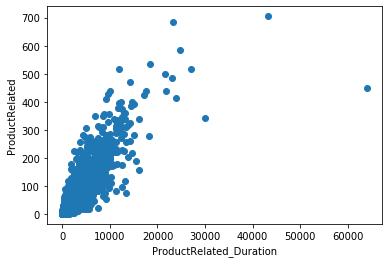

In [192]:
dt=dt
plt.scatter(dt['ProductRelated_Duration'],dt['ProductRelated'])
plt.xlabel("ProductRelated_Duration")
plt.ylabel("ProductRelated")
plt.show()

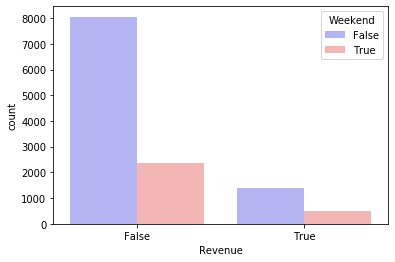

In [146]:
sns.countplot(data=dt, x="Revenue", hue="Weekend", palette="bwr")

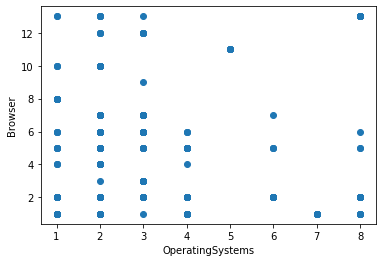

In [147]:
dt=dt
plt.scatter(dt['OperatingSystems'],dt['Browser'])
plt.xlabel("OperatingSystems")
plt.ylabel("Browser")
plt.show()

In [148]:
dt.loc['Sum '] = dt.sum()
print(dt)

       Administrative  Administrative_Duration  Informational  \
0                 0.0                 0.000000            0.0   
1                 0.0                 0.000000            0.0   
2                 0.0                 0.000000            0.0   
3                 0.0                 0.000000            0.0   
4                 0.0                 0.000000            0.0   
5                 0.0                 0.000000            0.0   
6                 0.0                 0.000000            0.0   
7                 1.0                 0.000000            0.0   
8                 0.0                 0.000000            0.0   
9                 0.0                 0.000000            0.0   
10                0.0                 0.000000            0.0   
11                0.0                 0.000000            0.0   
12                0.0                 0.000000            0.0   
13                0.0                 0.000000            0.0   
14                0.0    

In [149]:
dt.shape

(12331, 16)

In [150]:
s1=(26189/12332)
print(s1*100)
s2=(29063/12332)
print(s2*100)
s3=(23474/12332)
print(s3*100)
s4=(25749/12332)
print(s4*100)

212.36620175154073
235.67142393772298
190.3503081414207
208.79824845929292


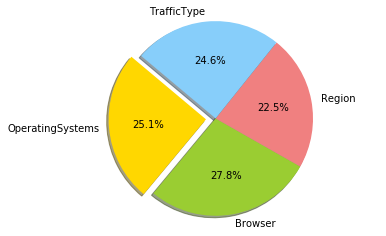

In [151]:
labels = 'OperatingSystems', 'Browser', 'Region', 'TrafficType'
sizes = [s1,s2,s3,s4]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [165]:
X=dt.drop(["Revenue"],axis=1)
y=dt.Revenue

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\ARSHAD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ARSHAD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ARSHAD\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
predictions=model.predict(X_test)

In [179]:
from sklearn.metrics import classification_report

In [180]:
classification_report(y_test,predictions)

C:\Users\ARSHAD\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


'              precision    recall  f1-score   support\n\n         0.0       0.94      0.93      0.94      2112\n         1.0       0.71      0.36      0.48       355\n      1908.0       0.00      0.00      0.00         0\n\n    accuracy                           0.85      2467\n   macro avg       0.55      0.43      0.47      2467\nweighted avg       0.91      0.85      0.87      2467\n'

In [181]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[1971,   52,   89],
       [ 129,  128,   98],
       [   0,    0,    0]], dtype=int64)

In [182]:
from sklearn.metrics import accuracy_score

In [183]:
accuracy_score(y_test,predictions)

0.8508309687880016